## -----------------------------------------------------------------
# AI & ML - Coursework 2 - 1st diet
## Student Name: Akama Emmanuel Ovokerie
## Student ID: S2229758

ATTESTATION: I confirm that the material contained within the submitted coursework is all my own work 
## -----------------------------------------------------------------

# 1. Introduction to Machine Learning

Machine Learning (ML) is a field of artificial intelligence (AI) that focuses on the development of algorithms and statistical models that enable computer systems to improve their performance on a specific task over time without being explicitly programmed. The primary goal of machine learning is to enable computers to learn from data, recognize patterns, and make decisions or predictions. Machine learning relies on data to train models. Data can include a variety of information, such as features, labels, and historical examples.

A model is a mathematical representation or algorithm that learns patterns from data. The model is trained on a dataset and can make predictions or decisions on new, unseen data. Training a machine learning model involves exposing it to a labeled dataset (input-output pairs) to learn the patterns and relationships between the input features and the output. During training, the model adjusts its parameters to minimize the difference between its predictions and the actual labels. After training, the model is tested on a separate dataset to evaluate its performance. Performance metrics are used to assess how well the model generalizes to new, unseen data.

There are three (3) major types of machine learning.
- *Supervised Learning*: In supervised learning, the algorithm is trained on a labeled dataset, where each input is associated with a corresponding output. The goal is to learn a mapping from inputs to outputs.
- *Unsupervised Learning*: Unkike supervised learning, in unsupervised learning, the algorithm is given unlabeled data and is tasked with finding patterns, structures, or relationships within the data without explicit guidance on what to learn.
- *Reinforcement Learning*: Reinforcement learning is a type of machine learning that involves an agent interacting with an environment and learning to make decisions by receiving feedback in the form of rewards or punishments.

Machine learning has a wide range of applications and is continuously evolving with advancements in algorithms, computational power, and the availability of large datasets. 

There are many applications of regression in business. For example, in marketing, regression is used for forecasting sales, analyzing customer behavior, and market research. In this report, we shall apply machine learning algorithms to predict the *Churn Score* of a fictional telco company that provides home phone and internet services to customers in Califonrnia.

# 2. Overview of the Dataset

The dataset include multiple demographic attributes of customers of a fictional telco company that provides home phone and internet services to 7043 customers in California.

### Problem Definition

The report contained in this coursework is focused on implementing ML algorithm to predict the *Churn Score* of a fictional telco company that provides home phone and internet services to 7043 customers in California. The dataset include multiple demographic attributes of customers that have left, stayed, or signed up for other services.

Customer churn is the proportion of contractual customers or subscribers who leave a supplier during a given period. It may indicate of customer dissatisfaction, cheaper and/or better offers from the competition, more successful sales and/or marketing by the competition, or reasons having to do with the customer life cycle. Churn is a crucial metric for many businesses since it captures the *Satisfaction Score*, *Churn Score*, and *Customer Lifetime Value* (CLTV) index of the business.

###  Module Imports
To execute the tasks contained in this report, we will need to import relevant Python modules. Since it is considered a good practice to import modules at the top of the notebook file, we shall do so here, rather than spread it throughout the whole file. This way a single look will inform of all the required modules to execute all code cells from one single cell

In [78]:
# import python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import  DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import  classification_report

### Data Ingestion
Data ingestion is the process of moving data from a source into a landing area or an object store where it can be used for ad hoc queries and analytics. 
A simple data ingestion pipeline consumes data from a point of origin, cleans it up a bit, then writes it to a destination.

In this section, we shall
1. Ingest the dataset saved on file locally with [pandas](https://www.w3schools.com/python/pandas/pandas_csv.asp) *read_csv()* library method
2. Evaluate the data structure
3. Identify the target and dependent variables  

In [57]:
# load the csv file from local storage
# NB: change the source path if loading from another location
df = pd.read_csv('C:/Users/emman/OneDrive - GLASGOW CALEDONIAN UNIVERSITY/Documents/GCU/Module - Software for Data Science/Assessments/CW 02/Datasets/Telco-Customer-Churn.csv')

In [58]:
# preview the data entries
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [59]:
# preview the data structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# 3. Data Preparation & Wrangling

A critical step in data preparation is data cleaning. This step typically involves fixing bad data in the dataset.

Bad data could be represented in the following forms; (1) missing or empty cells (2) data in the wrong format (3) wrong or misplaced data, and (4) duplicate records

An investigation into the description of the data stucture above reveals the following;
- There are 7043 observations in the dataset
- It's a dense dataset with no missing/null entries. (more investigation on this later)
- Most of the features are categorical object types, including `TotalCharges`. (more investigation on this later) 

First, we will deal with the `TotalCharges` column expressed as an *object* dtype. Clearly, entries in the `TotalCharges` column should expressed as *float*, not *object* dtypes. This will allow us to easily segregate the major numeric and categorical feature types.

In [60]:
# convert 'TotalCharges' from object to float datatype
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce').astype(float)

# preview the data (especially the datatype)
df['TotalCharges'].head()

0      29.85
1    1889.50
2     108.15
3    1840.75
4     151.65
Name: TotalCharges, dtype: float64

In [61]:
# check to confirm that all entries were converted
df['TotalCharges'].isna().sum()

11

Since, the entries that were not converted are few (just entries in 11 rows), we would remove the records containing these entries

In [62]:
# remove records containing missing entries
df.dropna(how='any', inplace=True)

# check to confirm no entries are missing
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

Next, we investigate the observations to see if all the records are unique

In [63]:
# check for customer unquiness
df['customerID'].is_unique

True

To make things simple, we will drop the `customerID` column since all the customer observations are unique. 

In [64]:
# remove irrelevant column
df = df.drop(['customerID'], axis=1)

# preview the data
df.head()    

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Next, we will check for, and handle duplicate records (if any)

In [65]:
# check for duplicate records
df.duplicated().sum()

22

We have 22 duplicate record, so we wil go ahead and delete them

Finally, we will check the count to confirm that all the duplicates were deleted

In [66]:
# remove the duplicate records
df.drop_duplicates(inplace=True)

# check again to confirm no duplicate record exits
df.duplicated().sum()

0

Earlier, we performed an investigation into the structure of the data and observed that most of the features are categorical object types that cannot be processing by a machine learning model. Hence, we would need to carry out an extra preprocessing step to convert them into numeric equivalents.

We will illustrate this step  
- manually, using [pandas](https://pandas.pydata.org/docs/dev/reference/api/pandas.DataFrame.map.html) *map()* method
- automatically, using [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) *LabelEncoder()* method

In [67]:
# get all the classes of each categorical feature
for f in df.columns.values:
    if df[f].dtype == object:
        print("%s: %s" % (f, df[f].unique())) 

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


#### Convert categorical features to numeric data

We can do this in two (2) ways.
(1) manual mapping with raw python code
(2) auto-mapping with python library (like *sklearn*)

However, only code for one of the methods below should be ran, as they both achieves the same result

- Method 1 - manual convertion with *map()* 

In [68]:
# create a mapping for categorical features
male_female = {'Male': 0, 'Female': 1}
no_yes = {'No': 0, 'Yes': 1}
internet_service = {'No': 0, 'DSL': 2, 'Fiber optic': 1}
no_phone_no_yes = {'No phone service': 0, 'No': 1, 'Yes': 2}
no_internet_no_yes = {'No internet service': 0, 'No': 1, 'Yes': 2}
contract_type = {'Month-to-month': 0, 'One year': 1, 'Two year': 2}
payment_method = {'Electronic check': 0, 'Mailed check': 1, 'Bank transfer (automatic)': 2, 'Credit card (automatic)': 3}

# map non-numeric ordinal features to their numeric equivalents
df['gender'] = df['gender'].map(male_female)
df['Partner'] = df['Partner'].map(no_yes)
df['Dependents'] = df['Dependents'].map(no_yes)
df['PhoneService'] = df['PhoneService'].map(no_yes)
df['MultipleLines'] = df['MultipleLines'].map(no_phone_no_yes)
df['InternetService'] = df['InternetService'].map(internet_service)
df['OnlineSecurity'] = df['OnlineSecurity'].map(no_internet_no_yes)
df['OnlineBackup'] = df['OnlineBackup'].map(no_internet_no_yes)
df['DeviceProtection'] = df['DeviceProtection'].map(no_internet_no_yes)
df['TechSupport'] = df['TechSupport'].map(no_internet_no_yes)
df['StreamingTV'] = df['StreamingTV'].map(no_internet_no_yes)
df['StreamingMovies'] = df['StreamingMovies'].map(no_internet_no_yes)
df['Contract'] = df['Contract'].map(contract_type)
df['PaperlessBilling'] = df['PaperlessBilling'].map(no_yes)
df['PaymentMethod'] = df['PaymentMethod'].map(payment_method)
df['Churn'] = df['Churn'].map(no_yes)

# preview the data
df.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,2,1,2,1,1,1,1,0,1,0,29.85,29.85,0
1,0,0,0,0,34,1,1,2,2,1,2,1,1,1,1,0,1,56.95,1889.50,0
2,0,0,0,0,2,1,1,2,2,2,1,1,1,1,0,1,1,53.85,108.15,1
3,0,0,0,0,45,0,0,2,2,1,2,2,1,1,1,0,2,42.30,1840.75,0
4,1,0,0,0,2,1,1,1,1,1,1,1,1,1,0,1,0,70.70,151.65,1
5,1,0,0,0,8,1,2,1,1,1,2,1,2,2,0,1,0,99.65,820.50,1
6,0,0,0,1,22,1,2,1,1,2,1,1,2,1,0,1,3,89.10,1949.40,0
7,1,0,0,0,10,0,0,2,2,1,1,1,1,1,0,0,1,29.75,301.90,0
8,1,0,1,0,28,1,2,1,1,1,2,2,2,2,0,1,0,104.80,3046.05,1
9,0,0,0,1,62,1,1,2,2,2,1,1,1,1,1,0,2,56.15,3487.95,0


- Method 2 - automatic convertion with *LabelEncoder()* 

In [12]:
# creating instance of LabelEncoder()
enc = LabelEncoder()

# create a listing of categorical columns
category_features = [f for f in df.columns if df[f].dtype == object]

# create a dataframe with the listing of categorical features
df_category_features = pd.DataFrame(df, columns=category_features)

for f in category_features:
# Assigning numerical values and storing in another column
    df_category_features[f] = enc.fit_transform(df_category_features[f])

# replace category features with corresponding encoded labels
df = df.drop(columns=category_features).join(df_category_features)

# preview the data
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,29.85,29.85,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,0,2,53.85,108.15,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


Next, we define the input features (X) and output label (y)

In [69]:
# define the features (X) and target label (y) 
X = df.drop(columns=['Churn'])
y = df['Churn'].values 

Then, we split the data into training (80%) and test (20%) sets

In [70]:
# split into train (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=234)

# 4. Model Selection, Training & Evaluation

Training a machine learning model involves exposing it to a labeled dataset to learn the patterns and relationships between the input features and the output. During training, the model adjusts its parameters to minimize the difference between its predictions and the actual labels. After training, the model is tested on a separate dataset to evaluate its performance. Performance metrics are used to assess how well the model generalizes to new, unseen data.

In this report, we will create, train and evaluate a machine learning model using decision tree and random forest classifiers.

- #### Decision Tree Classifier
A decision tree classifier is a supervised machine learning algorithm that is used for both classification and regression tasks. Decision tree classifiers build a tree-like structure to make decisions by partitioning the input data into subsets based on the values of different features. The tree structure consists of nodes, where each node represents a decision based on a specific feature, and leaves represent the class labels.

In this task, we create and tune a decision tree classifier with criterion hyperparameters for the cross validation and maximun tree depth.

In [71]:
# define the model
model = DecisionTreeClassifier()

# define model parameters
tuned_parameters = [
    {"criterion": ["gini", "entropy"], 
     "max_depth": [2, 3, 4, 5, 6, 7, 8, 9, 10]}
]

# get the best parameters
grid_search = GridSearchCV(
    model, tuned_parameters, scoring="accuracy",cv=5)

# fit the model with the best parameters
grid_search.fit(X_train, y_train)

# print the best parameters
print("Best parameters:", grid_search.best_params_)

Best parameters: {'criterion': 'entropy', 'max_depth': 5}


After tuning our decision tree classifier, we observed that best model parameter are *{'criterion': 'entropy', 'max_depth': 5}*

Now, we are going to fit the model with these parameters, and compare their performance with the baseline performance

In [72]:
# print report based on best-fit
print(20*"-"+ "Grid Searched Decision Tree" + 20*"-")
best_DecisionTree = DecisionTreeClassifier(criterion='entropy', max_depth=5)
best_DecisionTree.fit(X_train, y_train)
predictions = best_DecisionTree.predict(X_test)
print("\nPerformance report:\n")
print(classification_report(y_test, predictions))

# print report based on baseline
print(20*"-"+ "Baseline Decision Tree" + 20*"-")
baseline_DecisionTree = DecisionTreeClassifier()
baseline_DecisionTree.fit(X_train, y_train)
predictions = baseline_DecisionTree.predict(X_test)
print("\nPerformance report:\n")
print(classification_report(y_test, predictions))

--------------------Grid Searched Decision Tree--------------------

Performance report:

              precision    recall  f1-score   support

           0       0.81      0.90      0.85      1013
           1       0.62      0.44      0.52       389

    accuracy                           0.77      1402
   macro avg       0.71      0.67      0.68      1402
weighted avg       0.76      0.77      0.76      1402

--------------------Baseline Decision Tree--------------------

Performance report:

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1013
           1       0.49      0.51      0.50       389

    accuracy                           0.71      1402
   macro avg       0.65      0.65      0.65      1402
weighted avg       0.72      0.71      0.72      1402



Now, let's evaluate the performance of our decision tree model

We can see that the best-fit model has a better performance with accuracy score of 77% compared to the baseline 71%.

- #### Random Forest Classifier

The Random Forest Classifier is an ensemble learning algorithm that combines the predictions of multiple decision trees to improve the overall accuracy and robustness of the model. It is used for both classification and regression tasks. Random Forest builds a forest of decision trees and merges their predictions to provide a more reliable and accurate prediction. 

Like we did earlier, we will create and tune a random forest classifier model based on the best hypermeters, and compare the results to see if it beats the model we created earlier.

In [73]:
# define the model
model = RandomForestClassifier(random_state=42)

# define model parameters
tuned_parameters =[
    {"n_estimators": [10, 50, 100], 
     "criterion": ["gini", "entropy"], 
     "max_depth": [2, 4, 6, 10, 12, 14, 16, 18, 20], 
     "max_features": ["sqrt", "log2"]}
]

# get the best parameters
grid_search = GridSearchCV(
    model, tuned_parameters, scoring="accuracy",cv=5)

# fit the model with the best parameters
grid_search.fit(X_train, y_train)

# print the best parameters
print("Best parameters:", grid_search.best_params_)

Best parameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 50}


After tuning our random forest classifier, we observed that best model parameter are *{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 50}*

Now, we are going to fit the model with these parameters, and compare their performance with the baseline performance

In [74]:
# print report based on best-fit
print(20*"-"+ "Grid Searched Random Forest" + 20*"-")
best_RandomForest = RandomForestClassifier(criterion='entropy', max_depth=10, max_features='sqrt', n_estimators=50)
best_RandomForest.fit(X_train, y_train) 
predictions = best_RandomForest.predict(X_test)
print("\nPerformance report:\n")
print(classification_report(y_test, predictions))

# print report based on baseline
print(20*"-"+ "Baseline Random Forest" + 20*"-")
baseline_RandomForest = RandomForestClassifier()
baseline_RandomForest.fit(X_train, y_train)
predictions = baseline_RandomForest.predict(X_test)
print("\nPerformance report:\n")
print(classification_report(y_test, predictions))


--------------------Grid Searched Random Forest--------------------

Performance report:

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1013
           1       0.67      0.54      0.60       389

    accuracy                           0.80      1402
   macro avg       0.75      0.72      0.73      1402
weighted avg       0.79      0.80      0.79      1402

--------------------Baseline Random Forest--------------------

Performance report:

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1013
           1       0.65      0.47      0.55       389

    accuracy                           0.78      1402
   macro avg       0.73      0.69      0.70      1402
weighted avg       0.77      0.78      0.77      1402



Again, let's evaluate the performance of our random forest classifier

As we can see, the best-fit model again has a better performance with accuracy score of 80% compared to the baseline 78%.

# 5. Summary, Discussion & Conclusion
In summary, we would say our model performed well with the data, scoring approxomately 78% and 80% on *accuracy* respectively. However, we noticed the random forest classifier had a better score. This is because a random forest classifier is typically an optimized version of a decision tree classifier model.

However, to present further discussion on inferences obtained from the data, we will visually analyze the *Churn Score* with respect to the demographic and monetary attributes on the data. For the demographic features, we will do a univariate analysis of `Churn` to `gender`, `SeniorCitizen`, `Partner`, and `Dependents`. Similarly, for the monetary features, we will do a bivariate analysis of `Churn` to `Contract`, `MonthlyCharges` and `TotalCharges`.

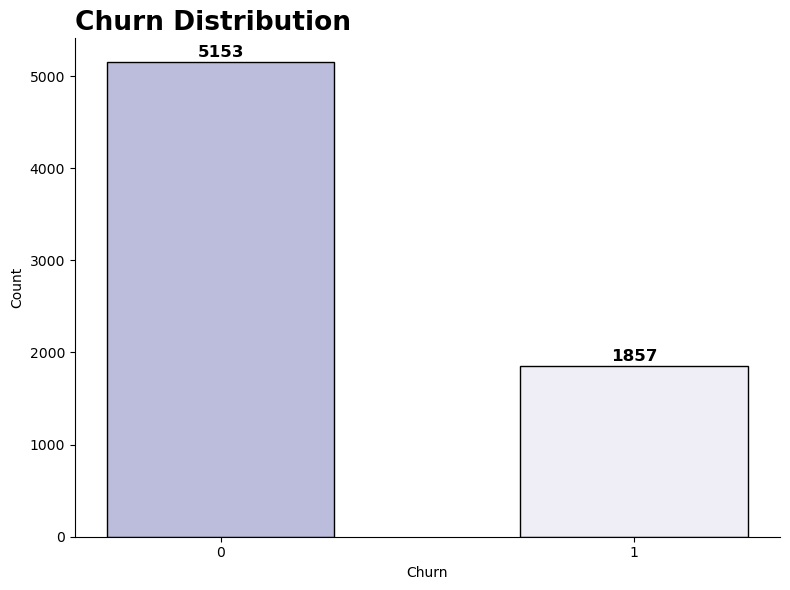

In [138]:
# get the value counts for 'Churn' column
data_temp = df['Churn'].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(8, 6))

# define the bar color palette
color_palette =["#bcbddc", "#efedf5"]

# plot the bar chart
ax.bar(data_temp.index, data_temp, width=0.55, color=color_palette, edgecolor="Black")

# set title and axis labels
ax.set_title('Churn Distribution', loc='left', fontsize=19, fontweight='bold')
ax.set_xlabel('Churn')
ax.set_ylabel('Count')

# annotate each bar with its count value
for i, count in enumerate(data_temp):
    ax.text(i, count + 50, str(count), ha='center', fontsize=12, fontweight='bold')

# hide spines on top and right sides
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

plt.tight_layout()
plt.show()

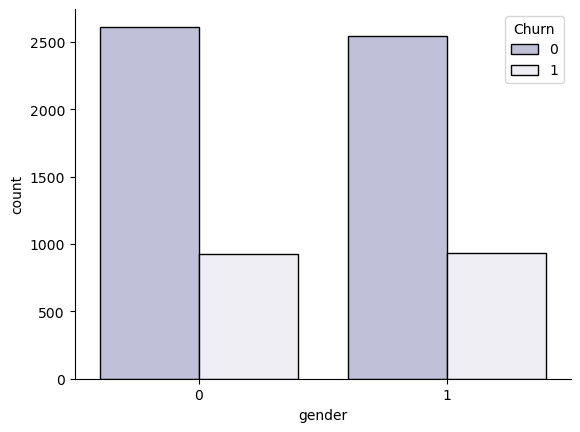

In [127]:
# to annotate, convert the 'Churn' column to string 
df['Churn'] = df['Churn'].astype(str)

# draw the count plot 'Churn' to 'gender'
sns.countplot(data=df,  x='gender', palette=color_palette, hue='Churn', edgecolor="Black", order=df['gender'].value_counts().index)
sns.despine()

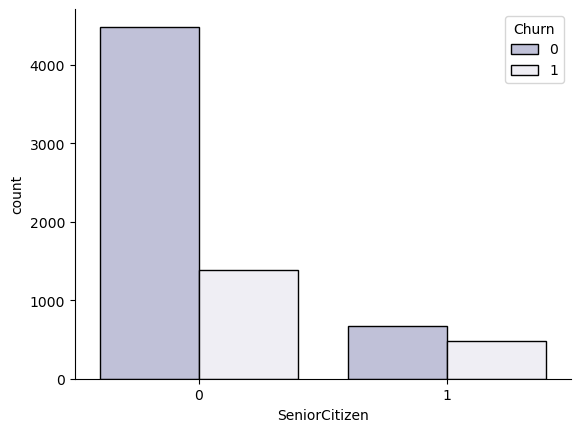

In [128]:
# draw the count plot 'Churn' to 'SeniorCitizen'
sns.countplot(data=df, x='SeniorCitizen', palette=color_palette, hue='Churn', edgecolor = 'Black', order=df['SeniorCitizen'].value_counts().index)
sns.despine()

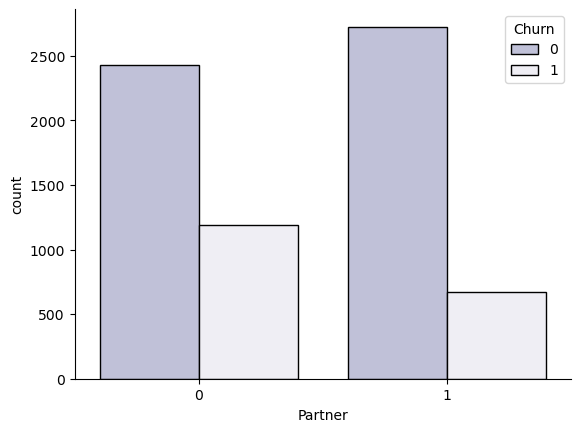

In [132]:
# draw the count plot 'Churn' to 'Partner'
sns.countplot(data=df, x='Partner', palette=color_palette, hue='Churn', edgecolor = 'Black', order=df['Partner'].value_counts().index)
sns.despine()

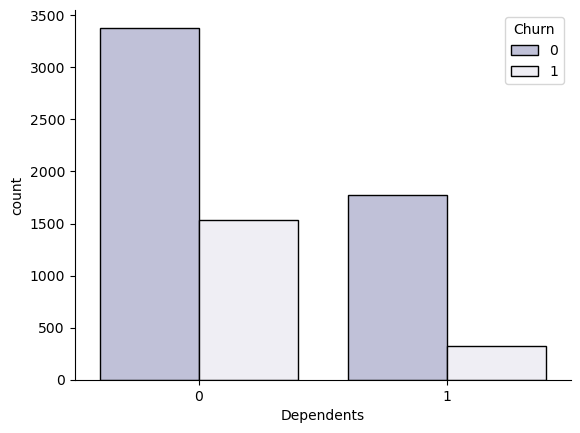

In [133]:
# draw the count plot of 'Churn' to 'Dependents'
sns.countplot(data=df, x='Dependents', palette=color_palette, hue='Churn', edgecolor = 'Black', order=df['Dependents'].value_counts().index)
sns.despine()

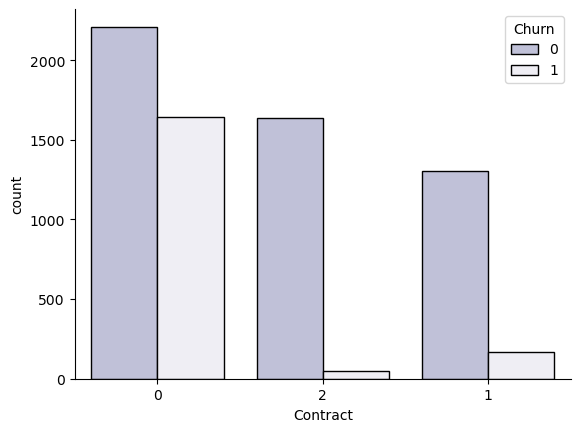

In [134]:
# draw the count plot of 'Churn' to 'Contract'
sns.countplot(data=df, x='Contract', palette=color_palette, hue='Churn', edgecolor = 'Black', order=df['Contract'].value_counts().index)
sns.despine()

Text(0.5, 1.0, 'Distribution of monthly charges by churn')

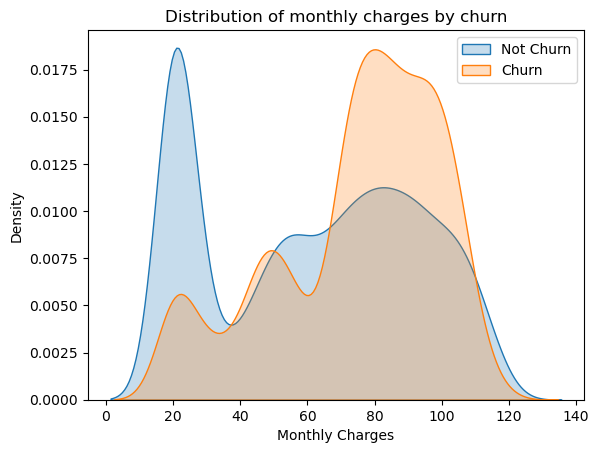

In [142]:
# draw KDE plot of 'Churn' to 'MonthlyCharges'
ax = sns.kdeplot(df['MonthlyCharges'][df['Churn'] == '0'], fill=True)
ax = sns.kdeplot(df['MonthlyCharges'][df['Churn'] == '1'], ax=ax, fill=True)
ax.legend(["Not Churn", "Churn"], loc='upper right')
ax.set_ylabel("Density")
ax.set_xlabel("Monthly Charges")
ax.set_title("Distribution of monthly charges by churn")

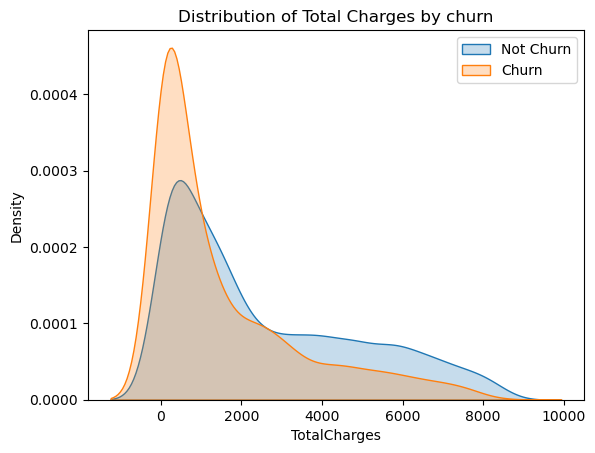

In [143]:
# draw KDE plot of 'Churn' to 'TotalCharges'
ax = sns.kdeplot(df['TotalCharges'][df["Churn"] == '0'], fill=True)
ax = sns.kdeplot(df['TotalCharges'][df["Churn"] == '1'], ax=ax, fill=True)
ax.legend(["Not Churn", "Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('TotalCharges')
ax.set_title('Distribution of Total Charges by churn');

As we can visually see, the following inferences can be made from the charts above.
1. The churn rate is about 1 to 3. Precisely, 1857 customers will churn, compared to 5153 that will not.
2. There was no significant difference between the *Churn* and *Not Churn* with respect to `gender`. Customers with these attributes behaved the same way. Some chruned, others did not. However, there's a much wider between the *Churn* and *Not Churn* with respect to `Dependents` and `Partner`. This showed that customers with these attributes responded differntly, with more tendency of customers having partners likely to *Churn*.
3. There's a high probablity that `SeniorCitizen` and customers on monthly contract will *Churn*.
4. When comparing the charges, customers with high monthly charges are more likely to *Churn*. Contrastly, customers with higher total charges didn't *Churn* when compared to customers in the monthly category.

In conclusion, the business should give more incentives to customers with partners and dependents as these category of customers could represent those that are more likely to *Churn* after the first month of their contract.

--- 

# References 

Sources:

- Introduction to Machine Learning - *Lecture Notes (Week 8)*
- Data Ingestion - https://www.w3schools.com/python/pandas/pandas_csv.asp
- Data cleaning - https://www.w3schools.com/python/pandas/pandas_cleaning.asp
- Visualization code snippets - https://www.kaggle.com/datasets/blastchar/telco-customer-churn/code